# Plotting for LWRegrid2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.colors as mcolors
%matplotlib nbagg
import xarray as xr
import xmitgcm as xgcm
import matplotlib.mlab as mlab
import jmkfigure
import scipy.io as sio
plt.style.use('ggplot')
def plotSlice(ax,D,var,vlim=0.1,cmap='RdBu_r'):
    pcm=ax.pcolormesh(D['x'],D['z'],D[var],vmin=-vlim,vmax=vlim,cmap=cmap)
    return pcm


In [6]:
N0=1e-3
g=9.8
alpha = 2e-4
dz=10.
T0 = 28-np.cumsum(N0**2/g/alpha*dz*np.ones(400))
energy = [[],[],[]]

In [33]:
for n in range(3):
    try:
        energy[n].close()
    except:
        pass
    energy[n] = xr.open_dataset('EnergyDemeanCW3dfull01U100000036090Step%03d.nc'%n)


## Plot energy

In [34]:
num=36090
U0=15
pre = 'CW3dlow01U%02d'%U0
#pre = 'regrid3dfilt01U100000028080'
#pre = 'regrid3dfullNH0000035280'
#energy=sio.loadmat('EnergyCW3dfull01U100000036090.mat')

if 0:
    with open('Energy%s%010d.pickle'%(pre,num),'rb') as f:
        print(f)
        #pickle.load()
        energy = pickle.load(f) #,encoding='latin1',fix_imports=True)
        for i in range(3):
            for k in energy[i].keys():
                energy[i][k]=np.squeeze(energy[i][k])

en = energy[1]
area = en['area']
dt = (energy[2]['time']-energy[0]['time'])
dt = np.divide(dt,np.timedelta64(1,'s'))
#print dt
dt = 3600.

print(dt)
dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
dPEdt=(energy[2]['PE']-energy[0]['PE'])/dt


dEdt=dKEdt+dPEdt

#resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
resid = -dEdt + en['Bf']-en['dWPdz'] - en['dwEdz']
area2 = area/1e6

3600.0


<IPython.core.display.Javascript object>


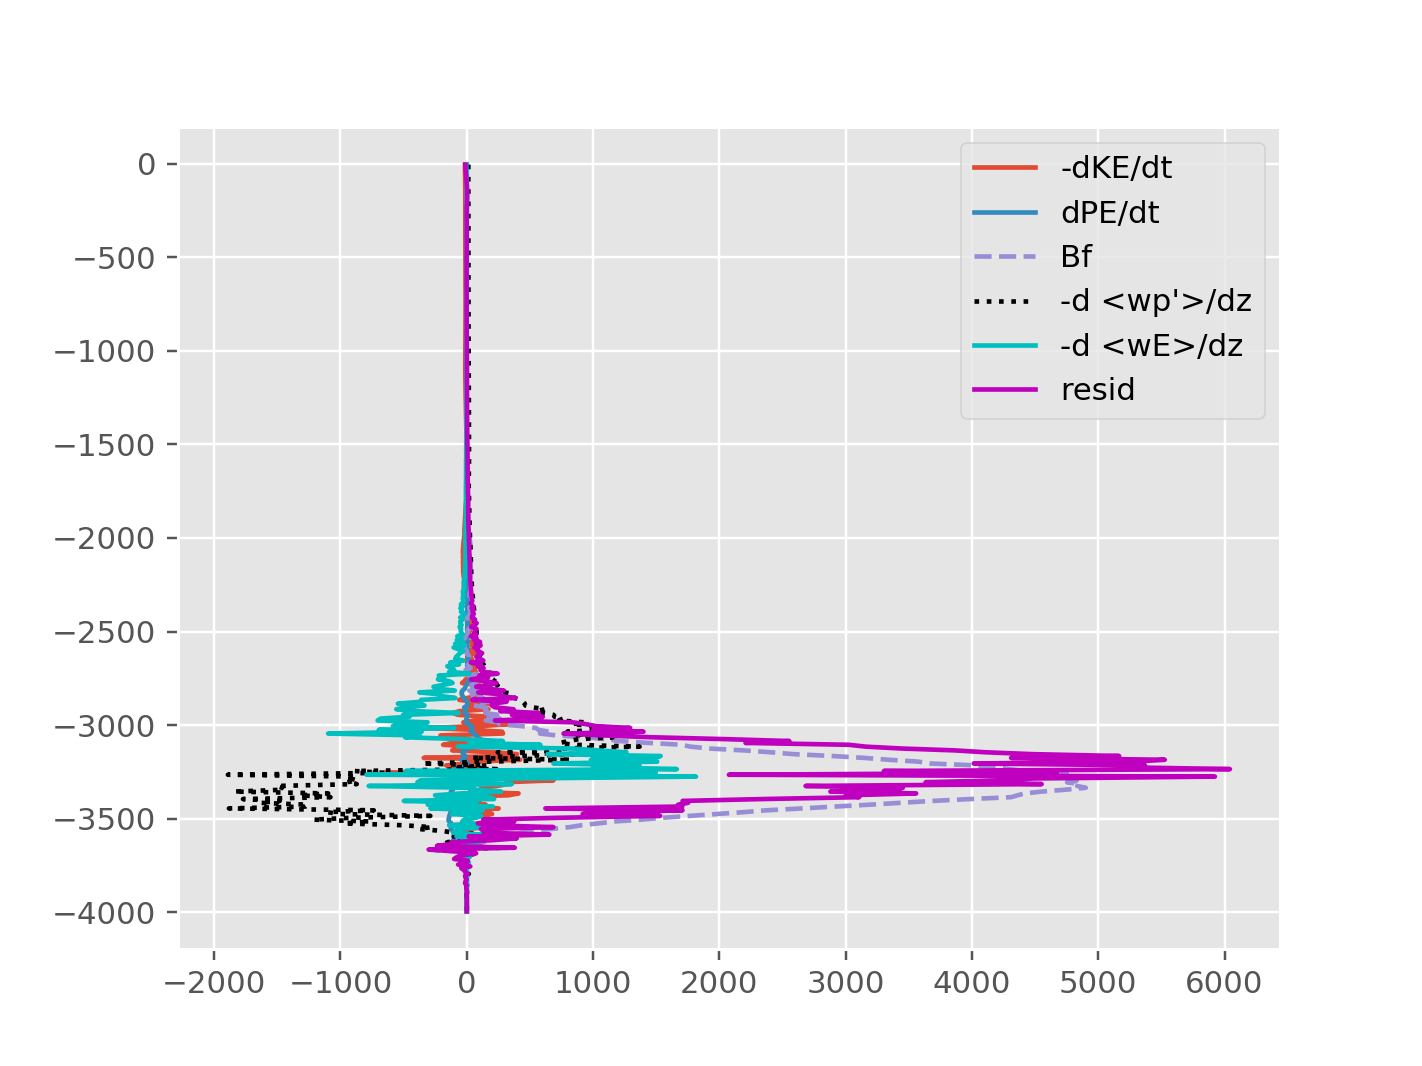

(400,)


/Users/jklymak/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


In [35]:
tds = [1]
tys = ['full']#,'filt','low']

res = np.zeros((3,4))
eps = np.zeros((3,4))

# plot energies
fig,ax=plt.subplots()

print(np.shape(energy[2]['KE']))


dwEdz = np.convolve(en['dwEdz'],np.ones(1.)/1.,mode='same')

resid = -dKEdt - dPEdt - en['dwEdz'] - en['dWPdz'] + en['Bf']

ax.plot(-dKEdt,en['Z'],label='-dKE/dt')
ax.plot(-dPEdt ,en['Z'],label='dPE/dt')

#ax.plot(en['ueW'],en['Z'],'--',label='ueW')
#ax.plot(-en['ueE'],en['Z'],'--',label='ueE')
#ax.plot(en['veN'],en['Z'],'--',label='veN')
#ax.plot(-en['veS'],en['Z'],'--',label='veS')
ax.plot(en['Bf'],en['Z'],'--',label='Bf')
ax.plot(-en['dWPdz'],en['Z'],'k:',label="-d <wp'>/dz")
ax.plot(-dwEdz,en['Z'],'c',label="-d <wE>/dz")
ax.plot(resid,en['Z'],'m',label="resid")

ax.legend()

In [6]:
fig,ax=plt.subplots(figsize=(5,10),dpi=50)
#fig.set_dpi(100)
fig.subplots_adjust(left=0.2)

ax.plot(-dEdt/area,en['Z'],label='-dE/dt: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(-dEdt*en['drF'])/area2))
ax.plot(en['Bf']/area,en['Z'],label='Bf:\t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['Bf']*en['drF'])/area2))
ax.plot(en['dWPdz']/area,en['Z'],label="d<wp'>/dz: \t %1.3f $\\times 10^{-6} m^3/s^3$"%(np.sum(en['dWPdz']*en['drF'])/area2))
ax.plot(resid/area,en['Z'],'k',lw=2,label='Resid=$\epsilon$:\t   %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(resid*en['drF'])/area2))
ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))

#ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
ax.set_title('%s %1.1f h '%(pre,np.divide(en['time'],np.timedelta64(1,'h'))))
ax.set_ylim([-4000,1300])
ax.set_ylabel('Z [m]')
ax.set_xlabel('Laterally Integrated Energy: kW/m')

legend=ax.legend()
#ax.set_xlim([-2320.,2090.])
if 0:
    #pass
    fig.savefig('doc/MeanEnergy'+pre+'.pdf')
    

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (1, 400) and (400,)

### Plot new style

<IPython.core.display.Javascript object>


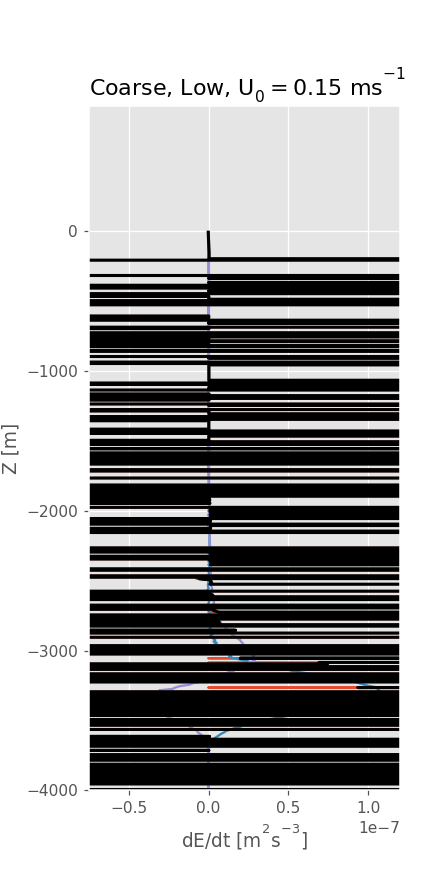

In [25]:
fig,ax=plt.subplots(figsize=(4,8),dpi=50)
#fig.set_dpi(100)
fig.subplots_adjust(left=0.2)

dEdt=dKEdt+dPEdt
#resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
resid = -dEdt +en['Bf'] - en['dWPdz'] - np.convolve(en['dwEdz'],np.ones(1)/1.,mode='same')
area2 = area/1e6
lab = ['-dE/dt','Bf','-d<wP>/dz','Resid.(Diss.)']
vals = [(np.sum(-dEdt.values*en['drF'])/area2), (np.sum(en['Bf']*en['drF'])/area2),
        (np.sum(-en['dWPdz']*en['drF'])/area2),(np.sum(resid.values*en['drF'])/area2)]
ax.plot(-dEdt/area,en['Z'],label='-dE/dt: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(-dEdt*en['drF'])/area2))
#ax.plot(dup/area,en['Z'],label='up: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(dup*en['drF'])/area2))
#ax.plot(due/area,en['Z'],label='uE: \t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(due*en['drF'])/area2))
ax.plot(en['Bf']/area,en['Z'],label='Bf:\t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['Bf']*en['drF'])/area2))
ax.plot(-en['dWPdz']/area,en['Z'],label="d<wp'>/dz: \t %1.3f $\\times 10^{-6} m^3/s^3$"%(np.sum(en['dWPdz']*en['drF'])/area2))
#ax.plot(-np.convolve(en['dwEdz'],np.ones(10)/10.,mode='same')/area2,en['Z'],label="d<wE>/dz: \t %1.3f $\\times 10^{-6} m^3/s^3$"%(np.sum(en['dwEdz']*en['drF'])/area2))
ax.plot(resid/area,en['Z'],'k',lw=2,label='Resid=$\epsilon$:\t   %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(resid*en['drF'])/area2))

#ax.plot(en['eps'][0]/area,en['Z'],'c',lw=2,label='Resid=$\epsilon$:\t   %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(resid*en['drF'])/area2))
#ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))

#ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
ax.set_title('Coarse, Low, $U_0=%1.2f\ \mathrm{ms^{-1}}$'%(U0/100.),loc='left')
ax.set_ylim([-4000,900])
ax.set_ylabel('Z [m]')
ax.set_xlabel(r'dE/dt $[m^2 s^{-3}]$')
ax.set_xticks(np.arange(-1.5,2.,0.5)*1.e-7)
ax.set_xlim([-0.75e-7,1.2e-7])
#legends = ['{:<14}{:.1f}'.format(lab[idx], vals[idx])+' $mW\,m^{-2}$' for idx in    range(len(lab))]

#legend=ax.legend(legends, loc=1, prop={'family': 'monospace'})
#ax.set_xlim([-2320.,2090.])
if 0:
    #pass
    jmkfigure.jmkprint('MeanEnergy'+pre,'PlotEnergyCoarse.ipynb',dpi=100)
    

In [54]:
print( np.diff([1,3,7]))

[2 4]


### Plot all energy

Really we are just going to get the totals for the energy terms.  I'm not sure, but this must exist for LWRegrid2.  But the idea is to compare that the 'Low' versions give similar energy residuals

In [44]:

print(pre)
with open('Energy%s%010d.pickle'%(pre,num),'rb') as f:
    print(f)
    #pickle.load()
    energy = pickle.load(f) 
#print(energy)
with open('EnergyCW3dlow01U100000036090.pickle','rb') as f:
    print(f)
    #pickle.load()
    energy = pickle.load(f) 

CW3dlow01U15
<_io.BufferedReader name='EnergyCW3dlow01U150000036090.pickle'>
<_io.BufferedReader name='EnergyCW3dlow01U100000036090.pickle'>


OSError: No such file or directory

In [134]:
import pickle
verts = np.zeros(4);resids = np.zeros(4);bfs = np.zeros(4);dedts=np.zeros(4)
u0 = np.array([2,5,10,15])
import datetime;now = datetime.datetime.now();now=now.replace(microsecond=0)
ds = xr.Dataset(coords={'u0':u0})
ds.attrs={'created by':'LWCoarse2/PlotEnergyCoarse.ipynb'}
ds.attrs.update({'Date':now.isoformat()})
print(ds)
ds['u0'].attrs={'units':'cm/s'}
ds['verts'] = xr.DataArray(np.zeros(4),coords=ds.coords,
                           attrs={'units':'kW/m^2'})
ds['resids'] = xr.DataArray(np.zeros(4),coords=ds.coords,
                           attrs={'units':'kW/m^2'})
ds['bfs'] = xr.DataArray(np.zeros(4),coords=ds.coords,
                        attrs={'units':'kW/m^2'})
ds['dedts'] = xr.DataArray(np.zeros(4),coords=ds.coords,
                           attrs={'units':'kW/m^2'})

for nn,U0 in enumerate(u0):

    num=36090
    pre = 'CW3dlow01U%02d'%U0
    print(pre)
    #pre = 'regrid3dfilt01U100000028080'
    #pre = 'regrid3dfullNH0000035280'
    #energy=sio.loadmat('EnergyCW3dfull01U100000036090.mat')
    with open('Energy%s%010d.pickle'%(pre,num),'rb') as f:
#    with open('EnergyCW3dlow01U050000036090.pickle','rb') as f:
        print(f)
        #pickle.load()
        energy = pickle.load(f) #,encoding='latin1',fix_imports=True)
        for i in range(3):
            for k in energy[i].keys():
                energy[i][k]=np.squeeze(energy[i][k])

    en = energy[1]
    area = en['Area']
    print(area)
    dt = (energy[2]['time']-energy[0]['time'])
    dt = np.divide(dt,np.timedelta64(1,'s'))
    #print dt
    dt = 3600.

    print(dt)
    dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
    dPEdt=(energy[2]['PE']-energy[0]['PE'])/dt

    dup = en['upW']-en['upE']+en['vpS']-en['vpN']
    due = en['ueW']-en['ueE']+en['veS']-en['veN']

    dEdt=dKEdt+dPEdt

    #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
    resid = -dEdt +dup+due+en['Bf']-en['dWPdz']
    area2 = area/1e6

    ds['dedts'][nn]=(np.sum(-dEdt.values*en['drF'])/area2)
    ds['bfs'][nn]=(np.sum(en['Bf']*en['drF'])/area2)

    ds['verts'][nn]=(np.sum(-en['dWPdz']*en['drF'])/area2)         
    ds['resids'][nn]=(np.sum(resid.values*en['drF'])/area2)


print(ds['verts'])

sio.savemat('EnergyCW3dlowTotals.mat',format='5',mdict={'u0':u0,'resids':resids,'bfs':bfs,'dedts':dedts,'verts':verts})
%ls *.mat
en = sio.loadmat('EnergyCW3dlowTotals.mat')
print (en.keys())
print(en['__header__'])


print(ds['bfs'].name)
# try saving as xarrays
ds.to_netcdf('EnergyCW3dlowTotals.nc',mode='w')

ds2 = xr.open_dataset('EnergyCW3dlowTotals.nc')
print(ds2)
print(ds2['u0'])

ds2.close()

<xarray.Dataset>
Dimensions:  (u0: 4)
Coordinates:
  * u0       (u0) int64 2 5 10 15
Data variables:
    *empty*
Attributes:
    created by:  LWCoarse2/PlotEnergyCoarse.ipynb
    Date:        2017-04-25T14:20:44
CW3dlow01U02
<_io.BufferedReader name='EnergyCW3dlow01U020000036090.pickle'>
48002092307.69229
3600.0
CW3dlow01U05
<_io.BufferedReader name='EnergyCW3dlow01U050000036090.pickle'>
48002092307.69229
3600.0
CW3dlow01U10
<_io.BufferedReader name='EnergyCW3dlow01U100000036090.pickle'>
48002092307.69229
3600.0
CW3dlow01U15
<_io.BufferedReader name='EnergyCW3dlow01U150000036090.pickle'>
48002092307.69229
3600.0
<xarray.DataArray 'verts' (u0: 4)>
array([-0.000405, -0.000422, -0.006781, -0.011205])
Coordinates:
  * u0       (u0) int64 2 5 10 15
Attributes:
    units:    kW/m^2
EnergyCW3dlowTotals.mat
dict_keys(['__header__', '__version__', '__globals__', 'u0', 'resids', 'bfs', 'dedts', 'verts'])
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Apr 25 14:20:44 2017'
bfs
<xarray.Dat

In [63]:
print(resids)
%ls 

[  1.60946017   7.97501065  25.3970809   50.63323477]
CW3dfilt01U10/                        EnergyCW3dlow01U100000036090.pickle
CW3dfull01U10/                        EnergyCW3dlow01U150000036090.pickle
CW3dlow01U02/                         EnergyCW3dlowTotals.mat
CW3dlow01U05/                         FixPickle.ipynb
CW3dlow01U10/                         GetEnergyBudget.py
CW3dlow01U15/                         GetEnergyBudget.py~
EnergyCW3dfull01U100000036090.pickle  PlotEnergyCoarse.ipynb
EnergyCW3dlow01U020000036090.pickle   doc/
EnergyCW3dlow01U050000036090.pickle


In [125]:
ds.attrs.update({'boo':'who'})
print(ds)

<xarray.Dataset>
Dimensions:  (u0: 4)
Coordinates:
  * u0       (u0) int64 2 5 10 15
Data variables:
    verts    (u0) float64 -0.0004052 -0.0004219 -0.006781 -0.01121
    resids   (u0) float64 1.609 7.975 25.4 50.63
    bfs      (u0) float64 1.555 7.724 25.45 47.42
    dedts    (u0) float64 -0.1906 -0.8234 -1.761 0.2031
Attributes:
    created by:  LWCoarse2/PlotEnergyCoarse.ipynb
    boo:         who


### Some other stuff

<xarray.Dataset>
Dimensions:  (XC: 416, XG: 416, YC: 128, YG: 128, Z: 400, Zl: 400, Zp1: 401, Zu: 400, time: 1)
Coordinates:
    iter     (time) int64 36000
  * time     (time) timedelta64[ns] 8 days 08:00:00
  * XC       (XC) float64 492.3 1.477e+03 2.462e+03 3.446e+03 4.431e+03 ...
  * YC       (YC) float64 462.5 1.388e+03 2.312e+03 3.238e+03 4.162e+03 ...
  * XG       (XG) float64 2.274e-13 984.6 1.969e+03 2.954e+03 3.938e+03 ...
  * YG       (YG) float64 0.0 925.0 1.85e+03 2.775e+03 3.7e+03 4.625e+03 ...
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    dxC      (YC, XG) float64 984.6 984.6 984.6 984.6 984.6 984.6 984.6 ...
    rAs      (YG, XC) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
    rAw      (YC, XG) float64

<IPython.core.display.Javascript object>


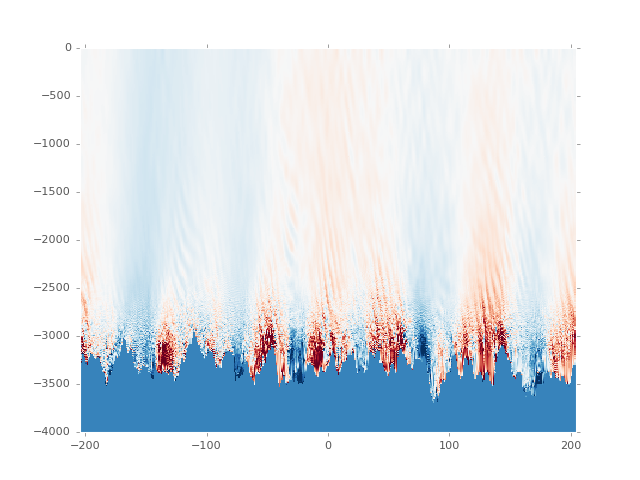

5
<xarray.Dataset>
Dimensions:  (XC: 416, XG: 416, Z: 400, Zl: 400, Zp1: 401, Zu: 400)
Coordinates:
    iter     int64 36000
    time     timedelta64[ns] 8 days 08:00:00
  * XC       (XC) float64 492.3 1.477e+03 2.462e+03 3.446e+03 4.431e+03 ...
    YC       float64 5.088e+03
  * XG       (XG) float64 2.274e-13 984.6 1.969e+03 2.954e+03 3.938e+03 ...
    YG       float64 4.625e+03
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    dxC      (XG) float64 984.6 984.6 984.6 984.6 984.6 984.6 984.6 984.6 ...
    rAs      (XC) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
    rAw      (XG) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
    Depth    (XC) float64 3.28e+03 3.28e+03 3.19e+03 3.22e+03 3.29e+03 

(<xarray.DataArray 'XG' ()>
 array(-204.3076923076919)
 Coordinates:
     iter     int64 36000
     time     timedelta64[ns] 8 days 08:00:00
     YC       float64 5.088e+03
     YG       float64 4.625e+03, <xarray.DataArray 'XG' ()>
 array(204.30769230769053)
 Coordinates:
     iter     int64 36000
     time     timedelta64[ns] 8 days 08:00:00
     YC       float64 5.088e+03
     YG       float64 4.625e+03)

In [25]:
ds = xr.open_dataset('CW3dfull01U10/ds0000036000.nc')
print(ds)
fig,ax = plt.subplots()
indy = np.where(ds['YC']>5.e3)[0][0]
print(indy)
sl = ds.isel(YC=indy,YG=indy,time=0)
print(sl)
x=sl['XG']/1e3
x=x-np.mean(x)
ax.pcolormesh(x,sl['Z'],sl['U']-0.1,vmin=-0.15,vmax=0.15,cmap='RdBu_r')
ax.set_xlim(x.min(),x.max())

In [4]:
print(pre)
ds = xr.open_dataset('%s/ds0000036090.nc'%pre)
print(ds.sizes['YC'])
print(ds.keys())
print(ds['KLeps'])
eps=ds['KLeps'].rename({'Zl':'Z'})
eps['Z']=ds['T']['Z']
print(eps.coords)
print(ds['hFacC'].coords)
print(ds['drF'].coords)
print(ds['V'].coords)
print(ds['U'].coords)


CW3dfull01U10
128
[u'iter', u'time', u'XC', u'YC', u'XG', u'YG', u'Zl', u'Zu', u'Z', u'Zp1', u'dxC', u'rAs', u'rAw', u'Depth', u'rA', u'dxG', u'dyG', u'rAz', u'dyC', u'PHrefC', u'drC', u'PHrefF', u'drF', u'hFacS', u'hFacC', u'hFacW', u'Eta', u'KLeps', u'T', u'W', u'V', u'U', u'PH']
<xarray.DataArray 'KLeps' (time: 1, Zl: 400, YC: 128, XC: 416)>
[21299200 values with dtype=float64]
Coordinates:
    iter     (time) int64 36090
  * time     (time) timedelta64[ns] 8 days 08:30:00
  * XC       (XC) float64 492.3 1.477e+03 2.462e+03 3.446e+03 4.431e+03 ...
  * YC       (YC) float64 462.5 1.388e+03 2.312e+03 3.238e+03 4.162e+03 ...
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    Depth    (YC, XC) float64 3.26e+03 3.27e+03 3.31e+03 3.37e+03 3.46e+03 ...
    rA       (YC, XC) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
Attributes:
    units: m^2/s^3
    long_name: KL10 Turbulent dissipation rate
    standard_name: KLeps
Coordinates:
    iter     (time) in

In [5]:
epsVert = ((eps*ds['hFacC']*eps['drF']).sum(dim='Z').values)[0]

In [45]:
# estimate u'p'
up = (ds['U']*ds['PH'].data*ds['hFacS'].data).sum(dim='Z')
vp = (ds['V']*ds['PH'].data*ds['hFacW'].data).sum(dim='Z')
print(up)
Bf = (ds['V']*ds['hFacC'].data*0.1*1e-4).sum(dim='Z')


<xarray.DataArray 'U' (time: 1, YC: 128, XG: 416)>
array([[[-1.349911, -1.300766, ..., -1.468196, -1.381055],
        [-1.375795, -1.327366, ..., -1.521487, -1.43346 ],
        ..., 
        [-1.333141, -1.287051, ..., -1.409868, -1.360044],
        [-1.333968, -1.298557, ..., -1.438651, -1.372512]]])
Coordinates:
    iter     (time) int64 36090
  * time     (time) timedelta64[ns] 8 days 08:30:00
  * YC       (YC) float64 462.5 1.388e+03 2.312e+03 3.238e+03 4.162e+03 ...
  * XG       (XG) float64 2.274e-13 984.6 1.969e+03 2.954e+03 3.938e+03 ...
    dxC      (YC, XG) float64 984.6 984.6 984.6 984.6 984.6 984.6 984.6 ...
    rAw      (YC, XG) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
    dyG      (YC, XG) float64 925.0 925.0 925.0 925.0 925.0 925.0 925.0 ...


In [6]:
epsVert[epsVert>0.1]=1e-11

<IPython.core.display.Javascript object>


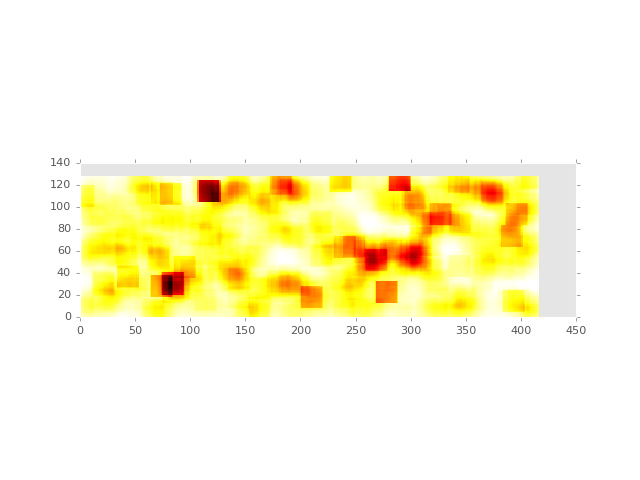

In [7]:
import scipy.ndimage.filters as scifilt
e = scifilt.uniform_filter(epsVert,size=20,mode='constant')
fig,ax=plt.subplots()
ax.pcolormesh(e,cmap="hot_r")
ax.set_aspect(1.)


In [50]:
%load_ext autoreload
%autoreload 2
import jmkdata as jd
x = ds['XC']
y = ds['YC']
X,Y = np.meshgrid(x,y)
binly = np.array([50.,100.,150.])
binl = np.array([100.,150.,200.,300.,360.,400.,500.])
r = np.zeros((len(binly),len(binl)))
rBf = np.zeros((len(binly),len(binl)))
rC = np.zeros((len(binly),len(binl)))

for jj,binlyy in enumerate(binly):
    print(jj)
    for ii,binll in enumerate(binl):
        binx = np.arange(0,x[-1],binll*1.e3)
        biny = np.arange(0,y[-1],binlyy*1.e3)
        m,v,n=jd.bindata(binx,biny,X.flatten(),Y.flatten(),epsVert.flatten())
        mB,v,n=jd.bindata(binx,biny,X.flatten(),Y.flatten(),Bf.values.flatten())
        #mC,v,n=jd.bindata(binx,biny,X.flatten(),Y.flatten(),Conv.flatten())
        
        r[jj,ii]=m.max()/m.min()
        rBf[jj,ii]=np.abs(mB).max()
        #rC[jj,ii]=mC.max()/mC.min()
print(r)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0


IndexError: index -1 is out of bounds for axis 1 with size 0

<IPython.core.display.Javascript object>


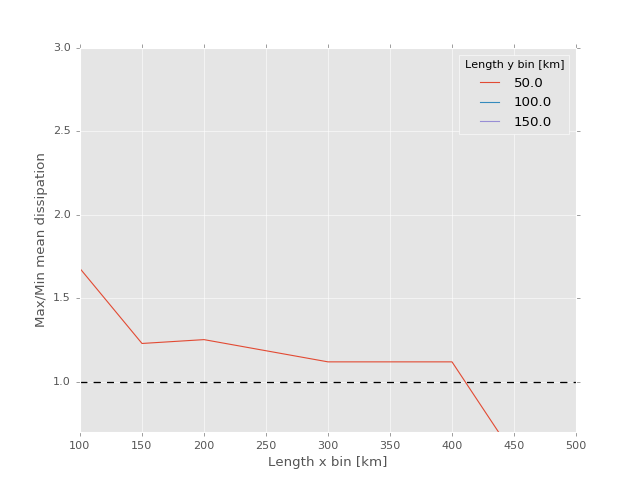

In [51]:
fig,ax=plt.subplots()
for jj,binlyy in enumerate(binly):
    ax.plot(binl,r[jj,:],label=binlyy)
    ax.axhline(1.,ls='--',c='k')
    ax.set_ylim([0.7,3.])
ax.set_xlabel('Length x bin [km]')
ax.set_ylabel('Max/Min mean dissipation')
ax.legend(title='Length y bin [km]')

<IPython.core.display.Javascript object>


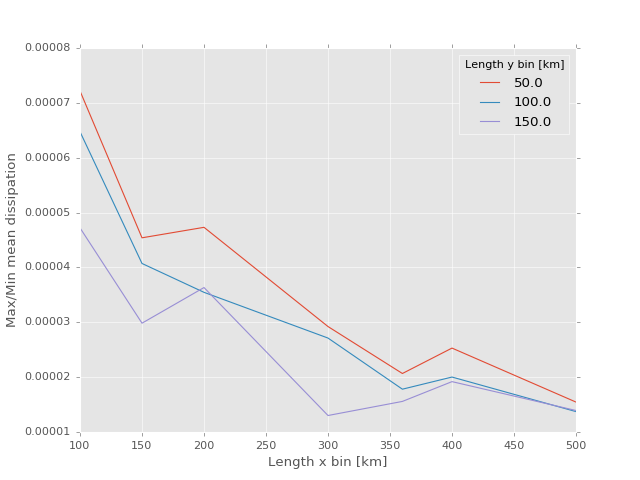

In [161]:
fig,ax=plt.subplots()
for jj,binlyy in enumerate(binly):
    ax.plot(binl,rBf[jj,:],label=binlyy)
    #ax.axhline(1.,ls='--',c='k')
    #ax.set_ylim([0.7,3.])
ax.set_xlabel('Length x bin [km]')
ax.set_ylabel('Max/Min mean dissipation')
ax.legend(title='Length y bin [km]')

<IPython.core.display.Javascript object>


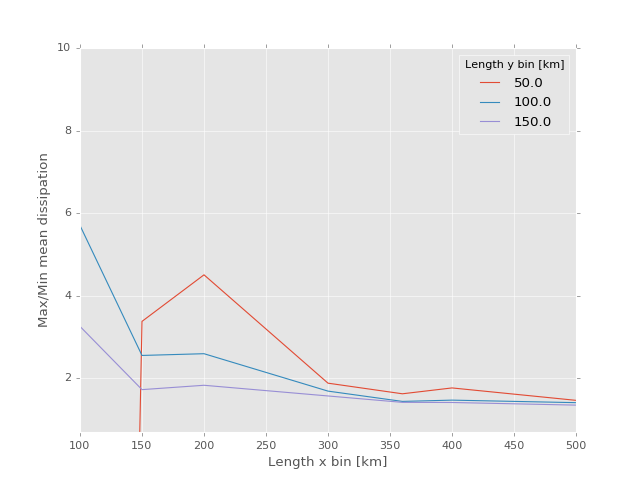

In [160]:
fig,ax=plt.subplots()
for jj,binlyy in enumerate(binly):
    ax.plot(binl,rC[jj,:],label=binlyy)
    #ax.axhline(1.,ls='--',c='k')
    ax.set_ylim([0.7,10.])
ax.set_xlabel('Length x bin [km]')
ax.set_ylabel('Max/Min mean dissipation')
ax.legend(title='Length y bin [km]')

<IPython.core.display.Javascript object>


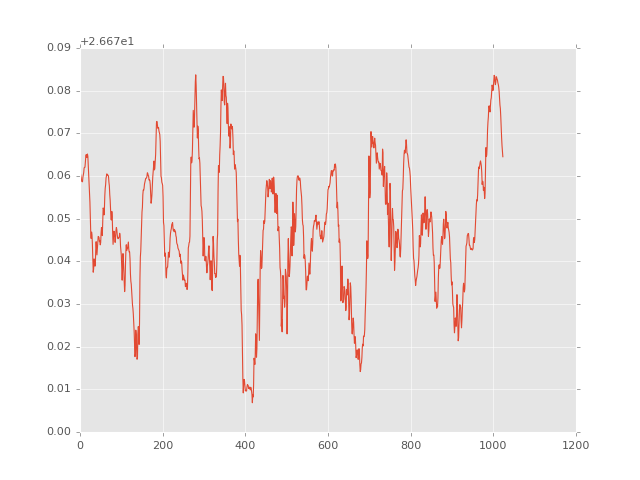

In [165]:
fig,ax=plt.subplots()
ax.plot(ds['T'][0,250,50,:])

In [55]:
print(ds['dxC'])

<xarray.DataArray 'dxC' (YC: 128, XG: 416)>
array([[ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385],
       [ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385],
       [ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385],
       ..., 
       [ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385],
       [ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385],
       [ 984.615385,  984.615385,  984.615385, ...,  984.615385,  984.615385,
         984.615385]])
Coordinates:
  * YC       (YC) float64 462.5 1.388e+03 2.312e+03 3.238e+03 4.162e+03 ...
  * XG       (XG) float64 2.274e-13 984.6 1.969e+03 2.954e+03 3.938e+03 ...
    dxC      (YC, XG) float64 984.6 984.6 984.6 984.6 984.6 984.6 984.6 ...
    rAw      (YC, XG) float64 9.108e+05 9.108e+05 9.108e+05 9.108e+05 ...
    dyG      (YC, XG) float

<IPython.core.display.Javascript object>


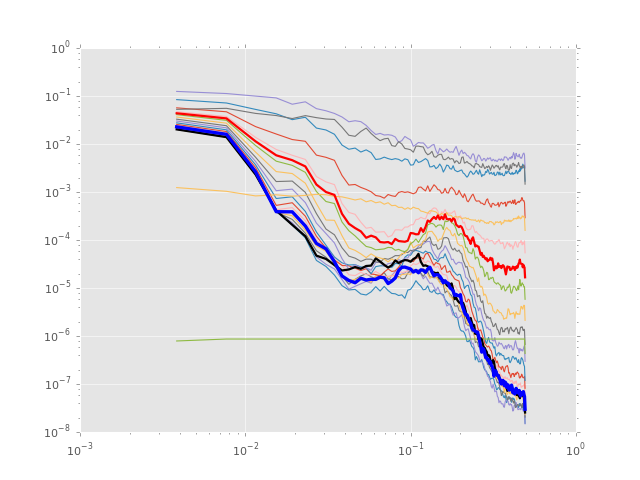

In [56]:
pp=0
fig,ax=plt.subplots()
    
for kk in range(0,400,20):
    pp=0
    for jj in range(125):
        p,f = mlab.psd(ds['U'][0,kk,jj,:],Fs=0.984,detrend='mean')
        pp+=p
    ax.loglog(f,pp/125.)
for kk in [1]:
    pp=0
    for jj in range(125):
        p,f = mlab.psd(ds['U'][0,kk,jj,:],Fs=0.984,detrend='mean')
        pp+=p
    ax.loglog(f,pp/125.,'k',lw=2.)
for kk in [100]:
    pp=0
    for jj in range(125):
        p,f = mlab.psd(ds['U'][0,kk,jj,:],Fs=0.984,detrend='mean')
        pp+=p
    ax.loglog(f,pp/125.,'b',lw=3.)
for kk in [250]:
    pp=0
    for jj in range(125):
        p,f = mlab.psd(ds['U'][0,kk,jj,:],Fs=0.984,detrend='mean')
        pp+=p
    ax.loglog(f,pp/125.,'r',lw=2.)
    

<IPython.core.display.Javascript object>


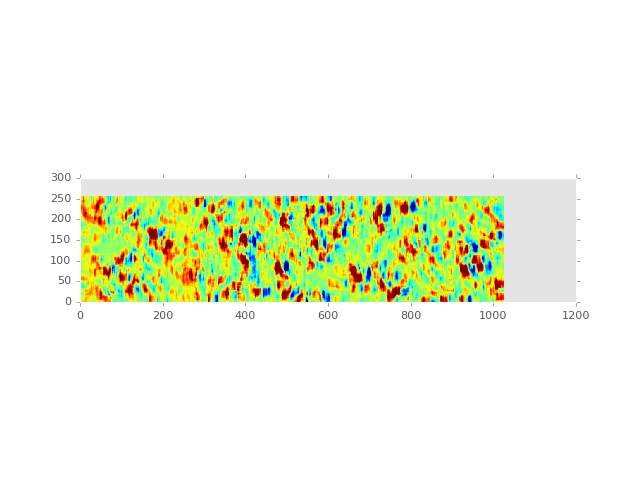

In [143]:
Conv = xr.open_dataset('Conv.nc')
Conv = Conv['SDIAG10'].values[0]
fig,ax=plt.subplots()
c = scifilt.uniform_filter(Conv,size=20,mode='constant')
ax.pcolormesh(c,vmin=-0.0001,vmax=0.0001)
ax.set_aspect(1.)

<IPython.core.display.Javascript object>


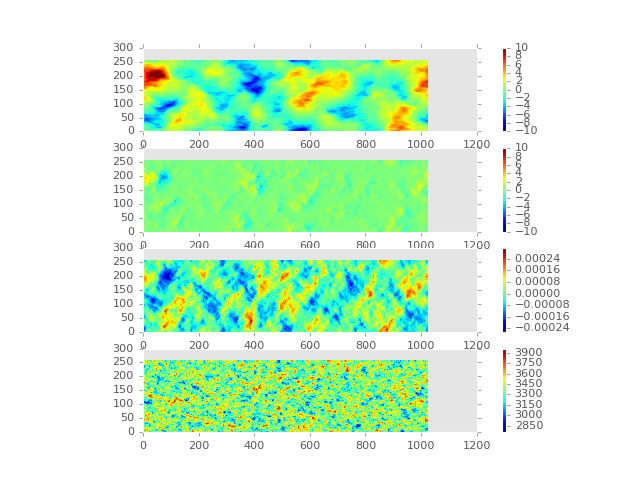

In [124]:
fig,ax=plt.subplots(4,1)
pcm=ax[0].pcolormesh(up[0],vmin=-10.,vmax=10.)
fig.colorbar(pcm,ax=ax[0])
ax[0].set_aspect(1.)
pcm=ax[1].pcolormesh(vp[0],vmin=-10.,vmax=10.)
fig.colorbar(pcm,ax=ax[1])
ax[1].set_aspect(1.)

pcm=ax[2].pcolormesh(Bf[0])#,vmin=-10.,vmax=10.)
fig.colorbar(pcm,ax=ax[2])
ax[2].set_aspect(1.)

pcm=ax[3].pcolormesh(ds['Depth'])#,colors='k')
fig.colorbar(pcm,ax=ax[3])
ax[3].set_aspect(1.)


<IPython.core.display.Javascript object>


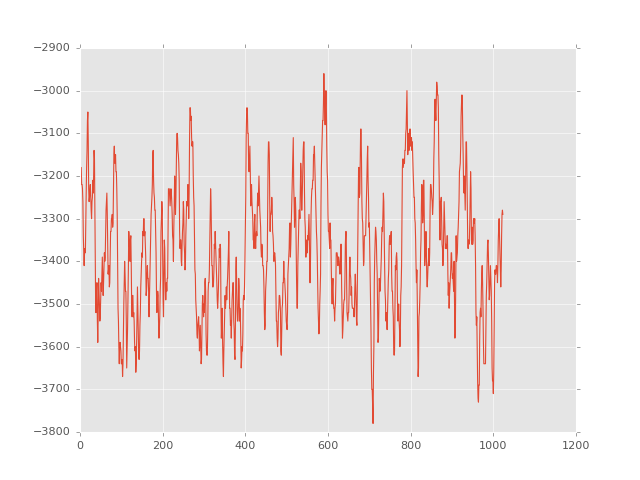

In [127]:
fig,ax=plt.subplots()
ax.plot(-ds['Depth'][100,:])

<IPython.core.display.Javascript object>


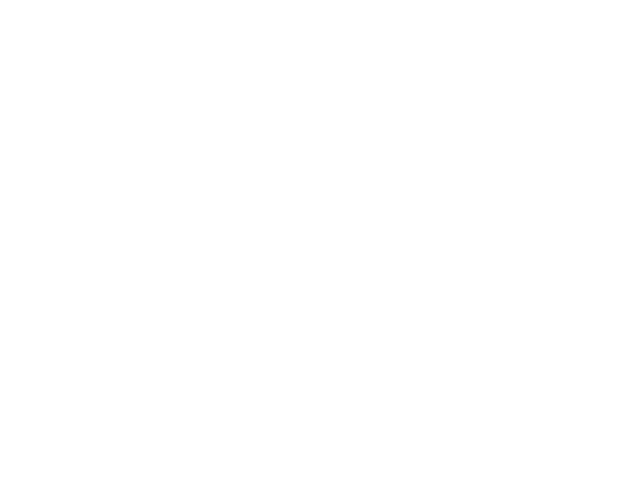

IOError: [Errno 2] No such file or directory: 'Energyregrid3dfilt01U100000013680.pickle'

In [20]:
fig,ax = plt.subplots()

for td in {13680,28080}:  #,35280,56880}:
    pre = 'regrid3dfilt01U10%010d'%td

    with open('Energy%s.pickle'%pre,'r') as f:
        energy = pickle.load(f)
        for i in range(3):
            for k in energy[i].keys():
                energy[i][k]=np.squeeze(energy[i][k])

    #print(np.shape(energy[1]['dWPdz']))
        ax.plot(np.cumsum(energy[1]['dWPdz']),en['Z'],label='%d'%td)
ax.legend()
ax.set_xlim([-20000,5000])
fig.savefig('WpProfilesLow.pdf')

<IPython.core.display.Javascript object>


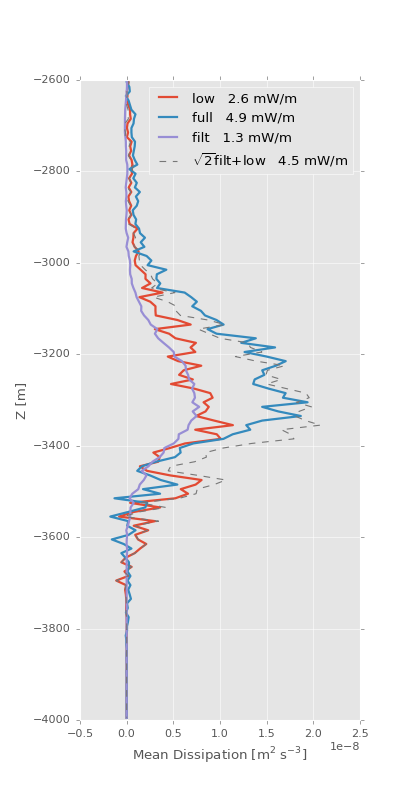

3.0


In [11]:
tds = [2,4,5]
tys = ['low','full','filt']
DY = 8*64*100.
dA= DY * 34.4e3*2

res = np.zeros((3,4))
eps = np.zeros((3,4))

fig,ax=plt.subplots(figsize=(5,10))
fig.subplots_adjust(left=0.2)
resids=[[0],[0],[0]]  
for mm,td in enumerate(tds):
    for nn,ty in enumerate(tys):
        pre = 'lee3d%s%02dU10'%(ty,td)
        energy = pickle.load(open('Energy'+pre+'.pickle','r'))

        dt = (en['time']-energy[0]['time']).data
        #A = intxCyCInner(ds['PH']*0.+1.,ds)
        #V = (A*ds['drF']).sum()
        dt = np.divide(dt,np.timedelta64(1,'s'))
        dup = en['upW']+en['upE']+en['vpS']+en['vpN']
        due = en['ueW']+en['ueE']+en['veS']+en['veN']

        dEdt=(en['KE']-energy[0]['KE'])/dt+(en['PE']-energy[0]['PE'])/dt

        #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
        resid = -dEdt +dup+due+en['Bf']+en['dWPdz']
        resids[nn]+=resid
print(np.float(len(tds)))
for nn in range(3):
    resids[nn] = resids[nn]/len(tds)
    ax.plot(resids[nn]/dA,en['Z'],lw=2,label=tys[nn]+' %5.1f mW/m'%nansum(resids[nn]*en['drF']*1e3/dA*1e3))
ax.plot((resids[0]+resids[2]*np.sqrt(2))/dA,en['Z'],'--',lw=1,label='$\sqrt{2}$filt+low'+' %5.1f mW/m'%nansum((resids[0]+resids[2]*np.sqrt(2.))*en['drF']*1e3/dA*1e3))
    
# ax.plot(en['eps'],en['Z'],'r',lw=2,label='$\epsilon_{KL}$')

#ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
#ax.set_title('Resid: %1.2e W and sum Epsilon %1.2e W '%(np.sum(resid.data*en['drF'].data),(np.sum(en['eps'].data*en['drF'].data))))
res[nn,mm]=np.sum(resid.data*en['drF'].data)
eps[nn,mm]=np.sum(en['eps'].data*en['drF'].data)

ax.legend()
#ax.set_xlim([-20.,120.])
ax.set_ylim([-4000,-2600.])

ax.set_ylabel('Z [m]')
ax.set_xlabel('Mean Dissipation $[m^2\,s^{-3}]$')
if 0:
    jmkprint('MeanEnergy'+pre,'PlotEnergy.ipynb')
    

In [36]:
print "full     filt   low  low+filt"
res = np.ma.masked_array(res,res==0)
for i in range(4):
    print('%6.0f %6.0f %6.0f %6.0f'%(res[0,i],res[1,i],res[2,i],res[1,i]+res[2,i]))


print np.mean(res[:,:-1],axis=1)


full     filt   low  low+filt
 11593   4699   2972   7672
 18424   4947  15641  20587
 22064   4588   9083  13671
 15503   4991    nan    nan
[17360.136632024874 4744.7632843719775 9231.854991138296]


<IPython.core.display.Javascript object>


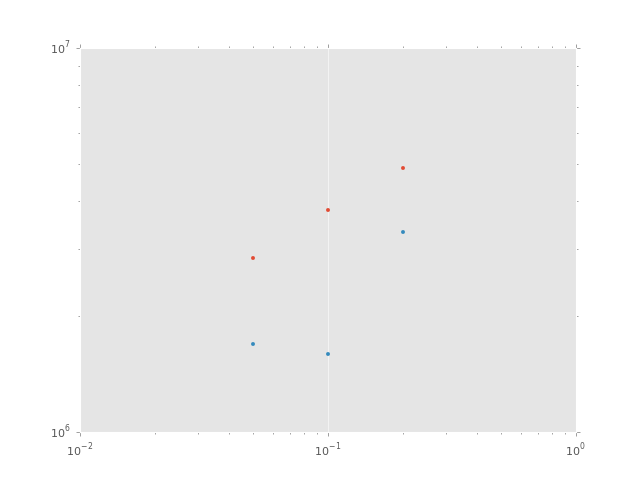

In [100]:
fig,ax=plt.subplots()
ax.loglog(U,res/U**2,'.')
ax.loglog(U,eps/U**2,'.')


In [72]:

print DY
print(nansum(resids[nn]*en['drF']*1e3/dA))

51200.0
0.00134696450433


In [71]:
print(dA)

3.52256e+12


In [55]:
print en.keys()

[u'KE', u'PE', u'eps', u'dWPdz', u'Bf', u'upW', u'upE', u'vpS', u'vpN', u'veS', u'veN', u'ueE', u'ueW', u'time', u'XC', u'YC', u'Z', u'Depth', u'rA', u'PHrefC', u'drF', u'hFacC', u'XG', u'YG', u'iter']


## Check bathy

<IPython.core.display.Javascript object>


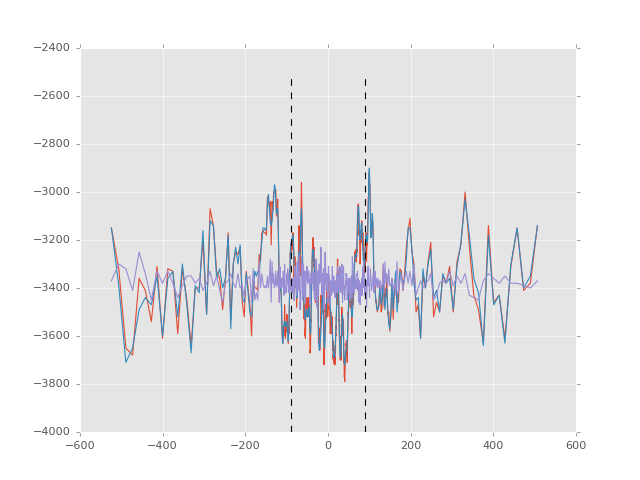

<xarray.Dataset>
Dimensions:                        (XC: 2048, YC: 512)
Coordinates:
  * XC                             (XC) float64 9.088e+03 2.689e+04 ...
  * YC                             (YC) float64 3.634e+03 1.073e+04 ...
    Depth                          (YC, XC) float64 3.3e+03 3.58e+03 ...
    rA                             (YC, XC) float64 1.321e+08 1.267e+08 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.3e+03 3.58e+03 ...
Attributes:
    __xarray_dataarray_name__: Depth
<xarray.Dataset>
Dimensions:                        (XC: 2048, YC: 512)
Coordinates:
  * XC                             (XC) float64 9.088e+03 2.689e+04 ...
  * YC                             (YC) float64 3.634e+03 1.073e+04 ...
    Depth                          (YC, XC) float64 3.28e+03 3.59e+03 ...
    rA                             (YC, XC) float64 1.321e+08 1.267e+08 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.28e+03 3.59e+03 ...
Attributes:
   

In [15]:
todo = {'Depthregrid3dfilt01U10.nc','Depthregrid3dfull01U10.nc','Depthregrid3dlow01U10.nc'}
fig,ax=plt.subplots()
for td in todo:
    d=xr.open_dataset(td)
    x = d['XC'].values/1.e3
    x = x-np.mean(x)
    print(d)
    ax.plot(x,-d['Depth'][256,:])
    indx = np.argwhere(np.diff(d['XC'].values)==100.).squeeze()
    indy = np.argwhere(np.diff(d['YC'].values)==100.).squeeze()
ax.plot(x[indx[0]]+np.zeros(2),np.array([-4000,-2500]),'k--')
ax.plot(x[indx[-1]]+np.zeros(2),np.array([-4000,-2500]),'k--')

<IPython.core.display.Javascript object>


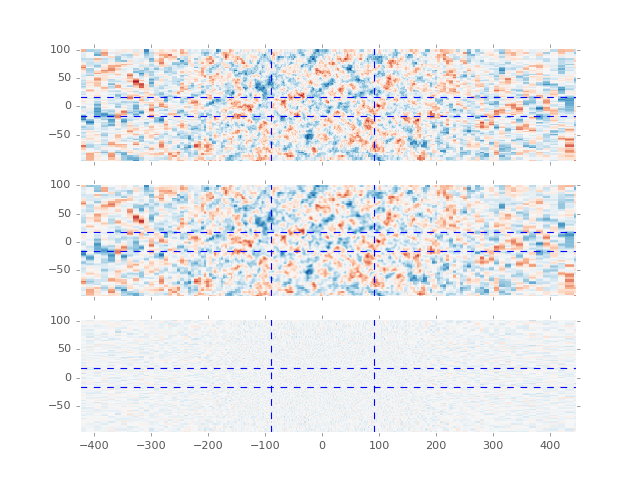

<xarray.DataArray 'Depth' ()>
array(3990.0)
<xarray.DataArray 'Depth' ()>
array(3910.0)
<xarray.DataArray 'Depth' ()>
array(3550.0)


In [30]:
todo = {'Depthregrid3dfilt01U10.nc','Depthregrid3dfull01U10.nc','Depthregrid3dlow01U10.nc'}
fig,axs=plt.subplots(3,1,sharex=True,sharey=True)
for nn,td in enumerate(todo):
    ax = axs[nn]
    d=xr.open_dataset(td)
    x = d['XC'].values/1.e3
    x = x-np.mean(x)
    y = d['YC'].values/1.e3
    y = y-np.mean(y)
    print(np.max(d['Depth']))
    ax.pcolormesh(x,y,-d['Depth'],vmin=-4000,vmax=-2700,cmap='RdBu_r')
    indx = np.argwhere(np.diff(d['XC'].values)==100.).squeeze()
    indy = np.argwhere(np.diff(d['YC'].values)==100.).squeeze()
    ax.axhline(y=y[indy[0]],ls='--'); ax.axhline(y=y[indy[-1]],ls='--')
    ax.axvline(x=x[indx[0]],ls='--'); ax.axvline(x=x[indx[-1]],ls='--')
    ax.set_aspect(1.)

In [114]:
print(indy)

[ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 33

<IPython.core.display.Javascript object>


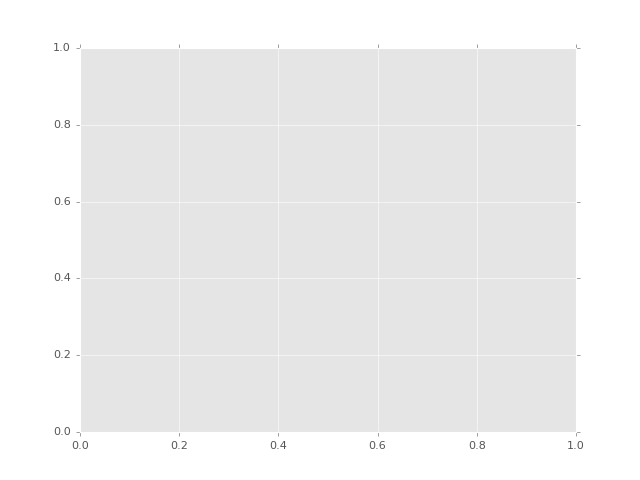

1797
1797
1797


In [140]:
todo = ['Depthregrid3dfilt01U10.nc','Depthregrid3dfull01U10.nc','Depthregrid3dlow01U10.nc']
fig,ax=plt.subplots()
ppp=[0,0,0]
nm=['','','']
for nn,td in enumerate(todo):
    d=xr.open_dataset(td)
    p=0.
    nfft = int(np.round(len(indx)/1.))
    print nfft
    for jj in indy:
        pp,f = mlab.psd(d['Depth'][jj,indx],NFFT=nfft,Fs=1./0.1,detrend='mean')
        p+=pp
    ppp[nn]=p
    nm[nn] = td

<IPython.core.display.Javascript object>


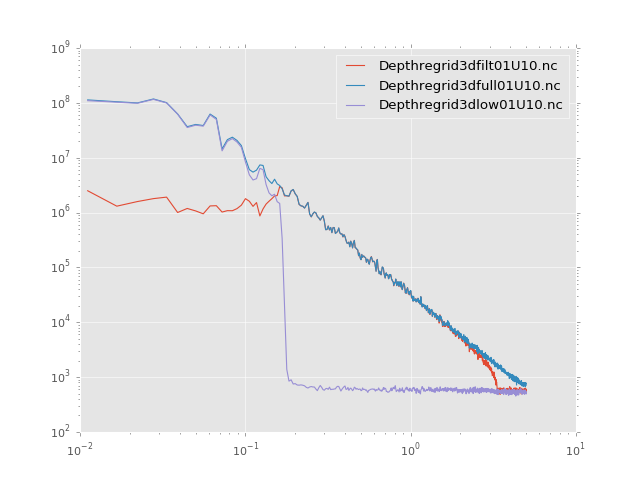

Depthregrid3dfilt01U10.nc


In [141]:
fig,ax = plt.subplots()
print(todo[0])
for ii in range(3):
    ax.loglog(f[2:],ppp[ii][2:],label=todo[ii])
ax.legend()

<IPython.core.display.Javascript object>


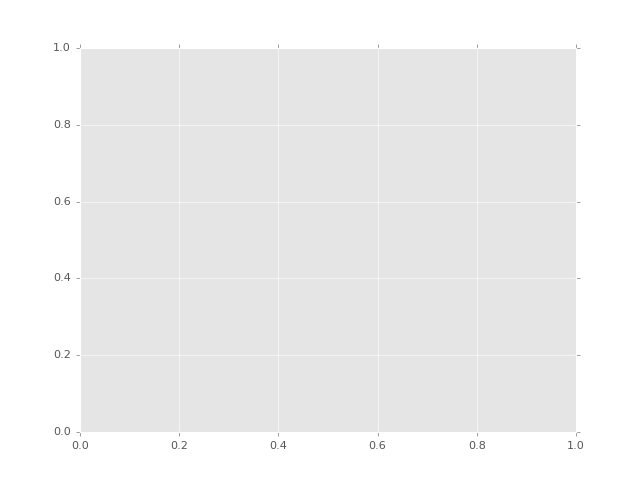

<xarray.Dataset>
Dimensions:                        (XC: 2048, YC: 512)
Coordinates:
  * XC                             (XC) float64 9.088e+03 2.689e+04 ...
  * YC                             (YC) float64 3.634e+03 1.073e+04 ...
    Depth                          (YC, XC) float64 3.4e+03 3.37e+03 ...
    rA                             (YC, XC) float64 1.321e+08 1.267e+08 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.4e+03 3.37e+03 ...
Attributes:
    __xarray_dataarray_name__: Depth
<xarray.Dataset>
Dimensions:                        (XC: 2048, YC: 512)
Coordinates:
  * XC                             (XC) float64 9.088e+03 2.689e+04 ...
  * YC                             (YC) float64 3.634e+03 1.073e+04 ...
    Depth                          (YC, XC) float64 3.3e+03 3.58e+03 ...
    rA                             (YC, XC) float64 1.321e+08 1.267e+08 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.3e+03 3.58e+03 ...
Attributes:
    _

In [4]:
todo = ['Depthregrid3dfilt01U10.nc','Depthregrid3dfull01U10.nc','Depthregrid3dlow01U10.nc']
fig,ax=plt.subplots()
ppp=[0,0,0]
nm=['','','']
for nn,td in enumerate(todo):
    d=xr.open_dataset(td)
    print(d)

<IPython.core.display.Javascript object>


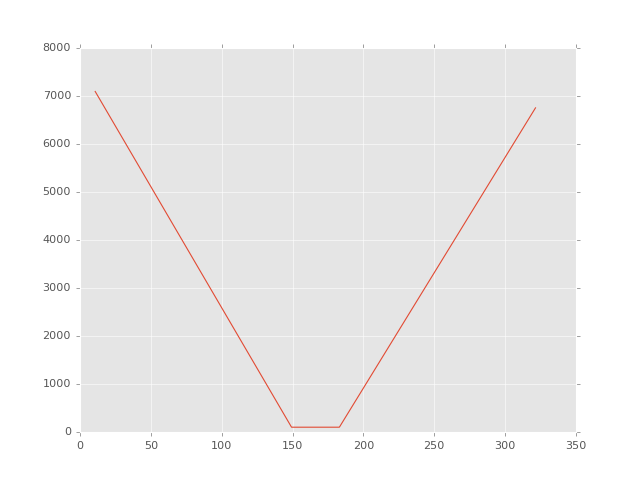

In [8]:
fig,ax = plt.subplots()
ax.plot(d['YC'][1:]/1e3,np.diff(d['YC']))